Try this notebook on Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/echoi/compgeodyn/master?labpath=PiecewisePolynomialInterpolation.ipynb)

# Piecewise Polynomial interpolation

We closely follow Ch. 8 of Quarteroni (2000) to learn 
- Polynomial interpolation: Lagrange interpolation
- Piecewise Lagrange interpolation

## Interpolating function
We want to approximate a function which is known only through its nodal values:
    $n+1$ pairs of data $(x_{i},y_{i})$ are given. Find a function $\Phi(x_{i})=y_{i}$ for $i$=0,$\ldots$,n.
- We say "$\Phi$ interpolates $\{y_{i}\}$ at the nodes $\{x_{i}\}$.
- $y_{i}$'s may represent the values attained at $x_{i}$ by a function $f$. Then, $\Phi$ will be a simpler function to deal with, especially for differentiation and integration.

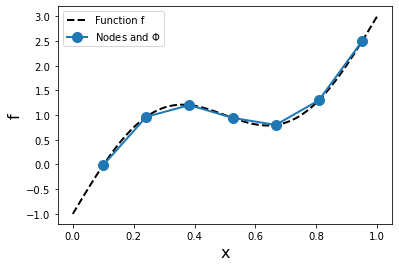

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def function_f(x):
    return np.sin(2.0*np.pi*x) + 4.0*x - 1.0

xrange = np.linspace(0.0, 1.0, 101)
nodes = np.linspace(0.1, 0.95, 7)
nodal_values = function_f(nodes)
plt.plot(xrange,function_f(xrange),'k--',linewidth=2,label='Function f')
plt.plot(nodes, nodal_values,'o-',markersize=10,linewidth=2,label='Nodes and $\Phi$')
plt.xlabel('x',size=16)
plt.ylabel('f',size=16)
plt.legend(loc=2)
plt.show()

## Lagrange formula

Given $n+1$ pairs $(x_{i},y_{i})$, find a polynomial $\Pi_{m} \in \mathbb{P}_{m}$, called an "interpolating polynomial" s.t. $\Pi_{m}(x_{i}) = a_{m} x_{i}^{m} + \cdots + a_{1} x_{i} + a_{0} = y_{i}$, $i$=0,$\ldots$,$n$.

- $x_{i}$'s: Interpolation nodes
- $n < m$: Underdetermined
- $n > m$: Overdetermined

When $n=m$, the following result holds:


**Theorem**: Given $n+1$ distinct points, $x_{0}$, $\cdots$, $x_{n}$ and $n+1$ corresponding values, $y_{0}$, $\cdots$, $y_{n}$, there *exists* a *unique* polynomial $\Pi_{n} \in \mathbb{P}_{n}$ s.t. $\Pi_{n}(x_{i})=y_{i}$ for $i=0,\cdots,n$.

**Proof**: Let $\{l_{i}\}_{i=0}^{n}$ be a basis for $\mathbb{P}_{n}$. $\Pi_{n}(x) = \sum_{i=0}^{n} b_{i} l_{i}(x)$ with the property that $\Pi_{n}(x_{i}) = \sum_{j=0}^{n} b_{j} l_{j}(x_{i}) = y_{i}$, $i=0,\cdots,n$. If we define $l_{i} \in \mathbb{P}_{n}$ as
\begin{equation}
  l_{i}(x) = \prod_{j=0,\,j\neq i}^{n} \frac{x-x_{j}}{x_{i}-x_{j}}, \quad i=0,\cdots,n,
\end{equation}
then $l_{i}(x_{j})=\delta_{ij}$ and therefore $b_{i}=y_{i}$. 

$l_{i}$ forms a basis for $\mathbb{P}_{n}$ and the interpolating polynomial $\Pi_{n}(x)$ exists and is given as $\Pi_{n}(x) = \sum_{i=0}^{n} y_{i}\,l_{i}(x)$, which is called the **Lagrangian form** of the interpolating polynomial.

**Example**: For $n=6$ and $i=2$,
\begin{equation}
l_{2} = \frac{x-x_{0}}{x_{2}-x_{0}}\frac{x-x_{1}}{x_{2}-x_{1}}\frac{x-x_{3}}{x_{2}-x_{3}}\frac{x-x_{4}}{x_{2}-x_{4}}\frac{x-x_{5}}{x_{2}-x_{5}}\frac{x-x_{6}}{x_{2}-x_{6}}.
\end{equation}

- $n=2$ and $i=0$?
- $n=3$ and $i=3$?

### Numerical example

In [2]:
# define a function that returns the basis function l_i(x)
def l_i(i,xdata,x):
    """
       return the value(s) of the 'i'-th basis function
       at locations in 'x' array using 'xdata' array.
    """
    n = len(xdata)-1
    assert i < n+1, "Index i out of bounds, {0}".format(len(xdata)-1)
        
    # create j index array
    jind = np.arange(n+1)
    # use mask the j array to skip j equal to i
    mask = np.ones(len(jind), dtype=bool)
    mask[i] = False
    
    # create a return value array of the same size with x
    value = np.ones(len(x))
    for j in jind[mask]: # Note that if j is not i
        value = value * (x-xdata[j])/(xdata[i]-xdata[j])
        
    return value

In [3]:
def LagrangeInterp(xdata, ydata, x):
    values = np.zeros(len(x))
    
    for i in range(len(xdata)):
        values = values + ydata[i] * l_i(i, xdata, x)
        
    return values

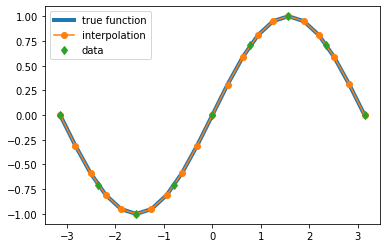

In [6]:
# Create data (x_i, y_i) with n = 10
n = 8
xdata = np.linspace(-np.pi, np.pi, n+1)
ydata = np.sin(xdata)

x = np.linspace(-np.pi, np.pi, 21)
plt.plot(x, np.sin(x), '-', label='true function', linewidth=4)
plt.plot(x, LagrangeInterp(xdata, ydata, x), 'o-', label='interpolation')
plt.plot(xdata, ydata, 'd', label='data')
plt.legend(loc=2)
plt.show()

## Drawback of polynomial interpolation
### Runge's counterexample

Let's approximate the following function:
\begin{equation}
  f(x) = \frac{1}{1+x^{2}} \quad -5 \le x \le 5
\end{equation}
using the Lagrange interpolation on **equally spaced nodes**.

The functions in the above example can be used.

In [7]:
def runge(x):
    return 1.0/(1.0+x**2)

# Store interpolation points (x) and the true function values (y)
x = np.linspace(-5.0, 5.0, 51)
y = runge(x)
# Equally-spaced nodes and data for n=5
xdata1 = np.linspace(-5.0, 5.0, 6)
ydata1 = runge(xdata1)
# Equally-spaced nodes and data for n=10
xdata2 = np.linspace(-5.0, 5.0, 11)
ydata2 = runge(xdata2)
print(xdata2, ydata2)


[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.] [0.03846154 0.05882353 0.1        0.2        0.5        1.
 0.5        0.2        0.1        0.05882353 0.03846154]


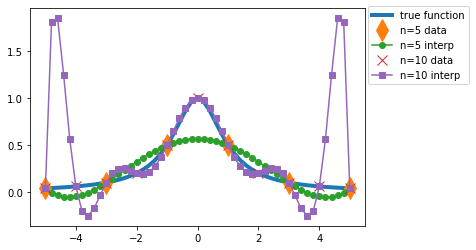

In [8]:
# plot true function values
plt.plot(x, y, '-', label='true function', linewidth=4)

# plot n=5 data and interpolation on 'x'
plt.plot(xdata1, ydata1, 'd', label='n=5 data', markersize=15)
plt.plot(x, LagrangeInterp(xdata1, ydata1, x), 'o-', label='n=5 interp')

# plot n=10 data and interpolation on 'x'
plt.plot(xdata2, ydata2, 'x', label='n=10 data', markersize=10)
plt.plot(x, LagrangeInterp(xdata2, ydata2, x), 's-', label='n=10 interp')

# add legends and show.
plt.legend(loc=(1.01,0.65))
plt.show()

## Stability of polynomial interpolation
For a set of function values $\{\tilde{f}(x_{i}) \}$ which is a perturbation of the data $\{ f(x_{i}) \}$ relative to the nodes $x_{i}$'s in an interval $[a,b]$, we get the following result:
\begin{equation}
\begin{split}
  \lVert \Pi_{n}f - \Pi_{n}\tilde{f} \rVert_{\infty} &= \max_{a \le x \le b} \left| \sum_{j=0}^{n} \left( f(x_{j})-\tilde{f}(x_{j}) \right) l_{j}(x) \right| \\
  & \le \Lambda_{n}(X) \max_{i=0,\ldots,n} \left| f(x_{i}) - \tilde{f}(x_{i}) \right|,
\end{split}
\end{equation}
where $\lVert \cdot \rVert_{\infty}$ is the maximum norm, $\lVert f \rVert_{\infty} = \max_{x\in [a,b]} \lVert f(x) \rVert$, $X$ is a lower triangular matrix of the infinite-size *interpolation matrix* on $[a,b]$, and $\Lambda_{n}(X)$ is the Lebesque constant of X, defined as $\Lambda_{n}(X) = \lVert \sum_{j=0}^{n} \lvert l_{j}^{(n)} \rvert \rVert_{\infty} $.


The main point is that for **equally spaced nodes**,
\begin{equation}
\Lambda_{n}(X) \approx \frac{2^{n+1}}{e\,n\,\log n},
\end{equation}
which can be **large for a large $n$**.

Since $\Lambda_{n}(X)$ is essentially a *condition number*, we conclude that the polynomial interpolation can be **unstable** for **equally spaced nodes** and **large $n$**.

Text(0, 0.5, '$\\Lambda_{n}$')

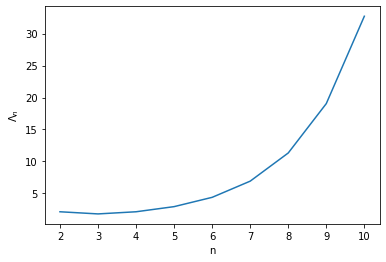

In [9]:
n = np.linspace(2,10,dtype="int")
plt.plot(n,np.power(2.0,n+1)/(np.e*n*np.log(n)))
plt.xlabel('n')
plt.ylabel('$\Lambda_{n}$')

#### Example
\begin{equation}
f(x) = \sin(2\pi x) \quad \text{on} \quad [-1,1]
\end{equation}
Data $f(x_{i})$ and perturbed data $\tilde{f}(x_{i})$ are generated on equally spaced nodes for $n=21$ such that $\vert f(x_{i})-\tilde{f}(x_{i}) \vert \approx 9.5 \times 10^{-4}$. By computing $\Pi_{21}f$ and $\Pi_{21}\bar{f}$, we get 
\begin{equation}
\Vert \Pi_{21}f-\Pi_{21}\tilde{f} \Vert_{\infty} \approx 2.1635 \quad \text{and} \quad \Lambda_{21} \approx 24000.
\end{equation}

<img src="./Figures/Quarteroni_Fig8.3.PNG" width=400 />

## Piecewise Lagrange Interpolation
Although unstable for a large number of equally spaced nodes, we do not simply throw out the Lagrange interpolation because

- Lagrange interpolation of a low degree is sufficiently accurate; and
- equally spaced nodes are convenient.

The solution is the **piecewise low-degree** Lagrange interpolation on **equally spaced nodes**.

The other solution would be to give up equally spaced nodes to go to high-degree polynomials. We will learn more about this idea later.


Let's consider a partition of $[a,b]$,

\begin{equation}
\mathcal{T}_{h}[a,b] = \left\{ I_{j}=[x_{j},x_{j+1}] \,|\, [a,b] = \cup_{j=0}^{K-1}\,I_{j}
\ \text{with}\ h=\max_{0\le j\le K-1}h_{j} \ \text{and}\ h_{j}=x_{j+1}-x_{j} \right\}
\end{equation}



For $k\ge 1$, the **piecewise polynomial space** is defined as

\begin{equation}
X_{h}^{k} = \left\{ v\in C^{0}([a,b]) \,|\, v|_{I_{j}} \in \mathbb{P}_{k}(I_{j})\ \text{for}\  ^{\forall}I_{j} \in \mathcal{T}_{h} \right\},
\end{equation}

where $C^{0}([a,b])$ is a space of **continuous function** on $[a,b]$ and $\mathbb{P}_{k}(I_{j})$ is a space of **polynomials of degree $\le k$** on the interval $I_{j}$.



The point of the above definition is that, for any continuous function $f$ in $[a,b]$, the **piecewise interpolation polynomial** $\Pi_{h}^{k}f \in X_{h}^{k}$ coincides on each $I_{j}$ with the restriction of $f$ on $I_{j}$ at the $n+1$ nodes, $\{ x_{j}^{(i)},\ 0\le i\le n\}$.


#### Example
Let's revisit Runge's counter-example.


In [4]:
# Store interpolation points (x) and the true function values (y)
x = np.linspace(-5.0, 5.0, 51)
y = runge(x)
# plot true function values
plt.plot(x, y, 'k-', label='true function', linewidth=4)

# K=2 (2 intervals)
K=2
# k=1
x0 = np.linspace(-5.0, 0.0, 26)
xdata0 = np.linspace(-5.0, 0.0, 2)
ydata0 = runge(xdata0)
x1 = np.linspace(0.0, 5.0, 26)
xdata1 = np.linspace(0.0, 5.0, 2)
ydata1 = runge(xdata1)
plt.plot(xdata0, ydata0, 'gd', label='K=2, k=1 data', markersize=15)
plt.plot(xdata1, ydata1, 'gd', markersize=15)
plt.plot(x0, LagrangeInterp(xdata0, ydata0, x0), 'go-', label='K=2, k=1 interp')
plt.plot(x1, LagrangeInterp(xdata1, ydata1, x1), 'go-')

# k=2
xdata2 = np.linspace(-5.0, 0.0, 3)
ydata2 = runge(xdata2)
xdata3 = np.linspace(0.0, 5.0, 3)
ydata3 = runge(xdata3)
plt.plot(xdata2, ydata2, 'ro', label='K=2, k=2 data', markersize=12)
plt.plot(xdata3, ydata3, 'ro', markersize=12)
plt.plot(x0, LagrangeInterp(xdata2, ydata2, x0), 'ro-', label='K=2, k=2 interp')
plt.plot(x1, LagrangeInterp(xdata3, ydata3, x1), 'ro-')

# add legends and show.
plt.legend(loc=(1.01,0.65))
#plt.show()

# plt.savefig('./K2_Runge_Interp.png', dpi=640, bbox_inches = "tight")

NameError: name 'runge' is not defined

<img src="./Figures/K2_Runge_Interp.png" width=600></img>

## Extension to the higher dimensions

Extension of polynomial interpolation to 2D is particularly simple.

When $\Omega = [a,b]\times[c,d]$ with nodes

\begin{equation}
\begin{split}
a=x_{0} \lt x_{1} \lt \cdots \lt x_{n} = b, \\
c=y_{0} \lt y_{1} \lt \cdots \lt y_{m} = d,
\end{split}
\end{equation}
interpolation polynomial $\Pi_{n,m}f$ of $f(x,y)$ is given as

\begin{equation}
\Pi_{n,m}f(x,y) = \sum_{i=0}^{n}\sum_{j=0}^{m} \alpha_{ij} l_{i}(x) l_{j}(y),
\end{equation}
where $l_{i}\in \mathbb{P}_{n}$ with $i=0,1,\cdots,n$, $l_{j} \in \mathbb{P}_{m}$ with $j=0,1,\cdots,m$ and $\alpha_{ij} = f(x_{i},y_{j})$.

However, the drawbacks of 1D Lagrangian interpolation are inherited.

<img src="./Figures/Quarteroni_Fig8.5.PNG" width=800 />

## Piecewise polynomial interpolation in 2D

- Can have low-degree polynomials on equally spaced nodes.
- More flexible and useful for domains of complex shape.

This technique is developed as follows:

- $\Omega$ is a polygon in $\mathbb{R}^{2}$ and partitioned into $K$ non-overlapping triangles (or "elements"), $T$.
The partition is denoted by $\mathcal{T}_{h}$ and also called **triangulation** of the domain.
- The above notation of a triangulation means that the maximum edge length of any $T$ is $\le h$.
- $\bar{\Omega}=\cup_{T\in\mathcal{T}_{h}} T$. The bar symbol means the *closure* of a set, which is the union of the interior and the boundary.
- **Admissable** $\mathcal{T}_{h}$ is the one where any pair of non-disjoint $T$'s may have a vertex or an edge in common.


- Admmisable triangulations (Fig. 8.6 of Quarteroni, 2000)

    <img src="./Figures/Quarteroni_Fig8.6a.PNG" width=400 />
- Non-admissable triangulations (Fig. 8.6 of Quarteroni, 2000)
    
    <img src="./Figures/Quarteroni_Fig8.6b.PNG" width=400 />
    

### Mapping of reference triangle
Now, it will prove extremely useful to realize that $^{\forall}T \in \mathcal{T}_{h}A$ can be considered as an image of the reference triangle $\hat{T}$ through the affine map

\begin{equation}
\mathbf{x} = \mathbf{F}_{T}(\hat{\mathbf{x}}) = \mathbf{B}_{T} \hat{\mathbf{x}} + \mathbf{b}_{T},
\end{equation}
where $\hat{\boldsymbol{x}} = (\hat{x},\hat{y})$.

<img src="./Figures/Quarteroni_Fig8.6c.PNG" width=400 />
(Fig. 8.6, Quarteroni, 2000)


If three vertices of $T$ are denoted as
\begin{equation}
\mathbf{a}_{i}^{T} = 
\begin{pmatrix}
x_{i} \\
y_{i}
\end{pmatrix}
\end{equation}
for $i=1,2,3$,

we get
\begin{equation}
\mathbf{B}_{T} = 
\begin{pmatrix}
x_{2}-x_{1} & x_{3}-x_{1} \\
y_{2}-y_{1} & y_{3}-y_{1}
\end{pmatrix}
\end{equation}

and

\begin{equation}
\mathbf{b}^{T} = 
\begin{pmatrix}
x_{1} \\
y_{1}
\end{pmatrix}
\end{equation}


## Piecewise polynomial on a triangulation
Let's denote the set of the interpolation nodes as $\mathcal{Z}$:

\begin{equation}
\mathcal{Z} = 
\begin{Bmatrix}
\mathbf{z}_{i} \vert \mathbf{z}_{i} = (x_{i},y_{i})^{T}, i=1,\ldots,N
\end{Bmatrix}.
\end{equation}

Then we can construct

\begin{equation}
\mathbb{P}_{k}(\Omega) = 
\begin{Bmatrix} 
p(x,y) = \sum_{i,j=0\\i+j\le k}^{k} a_{ij} x^{i} y^{j}, x, y \in \Omega
\end{Bmatrix}.
\end{equation}

For $k \ge 0$, $\mathbb{P}_{k}^{c}(\Omega)$, the space of **piecewise polynomials of degree $\le k$** can be defined as
\begin{equation}
^{\forall}p \in \mathbb{P}_{k}^{c}(\Omega), \quad p\vert_{T} \in \mathbb{P}_{k}(T)\ \text{for}\ ^{\forall}T \in \mathcal{T}_{h}. 
\end{equation}


#### Example
\begin{equation}
p \in \mathbb{P}_{1}(\Omega) = a_{00} + a_{10} x + a_{01} y.
\end{equation}

\begin{equation}
q \in \mathbb{Q}_{1}(\Omega) = \Pi_{11} f = \alpha_{00}\, l_{0}(x) l_{0}(y) + \alpha_{10}\, l_{1}(x) l_{0}(y) + \alpha_{01}\, l_{0}(x) l_{1}(y) + \alpha_{11}\, l_{1}(x) l_{1}(y).
\end{equation}


### Lagrange characteristic polynomials

An elementary basis for $\mathbb{P}_{k}^{c}(\Omega)$ consists of the **Lagrange characteristic polynomials**, $l_{i}=l_{i}(x,y)$ such that 
\begin{equation}
l_{i} \in \mathbb{P}_{k}^{c}(\Omega) \quad \text{and} \quad l_{i}(\mathbf{z}_{j}) = \delta_{ij},
\end{equation}
where $i$ and $j$ are indexes for interpolation nodes.

<image src="./Figures/Quarteroni_Fig8.7.PNG" width=640 />


#### Exercise
Let's say $T \in \mathcal{T}_{h}$ is composed of three interpolating nodes, $\mathbf{z}_{7}$, $\mathbf{z}_{9}$, and $\mathbf{z}_{19}$. The coordinates of the three nodes are $(2,3)$, $(4,4)$ and $(3,5)$. Find $l_{7,T}(x,y)$, $l_{9,T}(x,y)$ and $l_{19,T}(x,y)$.

### Putting them all together

Finally, the **Lagrange piecewise interpolating polynomial** of $f$, $\Pi_{h}^{k}f \in \mathbb{P}_{k}^{c}(\Omega)$ is defined as

\begin{equation}
\Pi_{h}^{k}f(x,y) = \sum_{i=1}^{N} f(\mathbf{z}_{i}) l_{i}(x,y).
\end{equation}

- $\Pi_{h}^{0}f(x,y)$: Piecewise constant
- $\Pi_{h}^{1}f(x,y)$: Piecewise linear over each $T$ and continuous on vertices; thus globally continuous.



For any $T \in \mathcal{T}_{h}$, $\Pi_{T}^{k}f$ is the restriction of $\Pi_{h}^{k}f$ on $T$ such that
\begin{equation}
\Pi_{T}^{k}f(x,y) = \sum_{m=0}^{d_{k}-1} f(\mathbf{z}_{T}^{(m)}) l_{m,T}(x,y)\ ^{\forall}T \in \mathcal{T}_{h},
\end{equation}

In the above definition, $d_{k} = (k+1)(k+2)/2$:

- $k=0$, $d_{0}=1$
- $k=1$, $d_{0}=3$
- $k=2$, $d_{0}=6$
    
<img src="./Figures/Quarteroni_Fig8.8.PNG" width=640 />



And $l_{m,T}$ is given as
\begin{equation}
\begin{split}
l_{m,T}(x,y) &= \hat{l}_{m,\hat{T}} \circ \mathbf{F}_{T}^{-1}(x,y) \\
             &= \hat{l}_{m}(\hat{x},\hat{y}).
\end{split}
\end{equation}
Since we know everything about the reference triangle, $\hat{l}_{m}$ are also completely known. All we need to know to evaluate $l_{m,T}(x,y)$ is to know $(\hat{x},\hat{y})$ corresponding to $(x,y)$.

#### Example
For $k=1$, let's find $\hat{l}_{0}(\hat{x},\hat{y})$.

$\hat{l}_{0}(\hat{x},\hat{y}) = a_{00} + a_{10}\,\hat{x} + a_{01}\,\hat{y}$ and we need to determine the coefficients, $a_{ij}$'s using the property of the characteristic polynomial: i.e.,
\begin{align}
\hat{l}_{0}(0,0) &= 1 = a_{00} \\ 
\hat{l}_{0}(1,0) &= 1 + a_{10} = 0 \rightarrow a_{10} = -1 \\ 
\hat{l}_{0}(0,1) &= 1 + a_{01} = 0 \rightarrow a_{01} = -1 \\ 
\end{align}
So, $\hat{l}_{0}(\hat{x},\hat{y}) = 1 - \hat{x} - \hat{y}$.

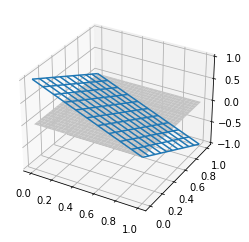

In [3]:
from mpl_toolkits.mplot3d import axes3d

x = np.linspace(0,1,51)
y = np.linspace(0,1,51)
X,Y = np.meshgrid(x,y)
Z = 1.0-X-Y # evaluation of the function on the grid
Zeros = X-X

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Zeros, color="white")
ax.plot_wireframe(X,Y,Z, rstride=5, cstride=5)


In practice, to evaluate $l_{m,T}(x,y)$ and complete the piecewise Lagrangian interpolation function,

\begin{equation}
\Pi_{T}^{k}f(x,y) = \sum_{m=0}^{d_{k}-1} f(\mathbf{z}_{T}^{(m)}) l_{m,T}(x,y)\ ^{\forall}T \in \mathcal{T}_{h},
\end{equation}

we need to find a triangle, $T$, that contains the point $(x,y)$.

Recall that 
\begin{equation}
\mathbf{x} = \mathbf{F}_{T}(\hat{\mathbf{x}}) = \mathbf{B}_{T} \hat{\mathbf{x}} + \mathbf{b}_{T}.
\end{equation}
From this,
\begin{equation}
\hat{\mathbf{x}} = \mathbf{B}_{T}^{-1} (\mathbf{x} - \mathbf{b}_{T}).
\end{equation}
